In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import numpy as np
import math
import sys
sys.path.insert(1, '../')

from kTree import *
import dissection_optimize
import layered_dissections

load("../Wave_param.py")

n = 7236
k = 4892
w = 6862

# Asymptotic

In [2]:
M_dissec,T_dissec,Res_dissection = dissection_optimize.compute_best_complexity_dissection(200)

Values of max l coefficient
Two levels
7: 0.046884711779448626
11: 0.047882205513784463
16: 0.041897243107769426
22: 0.03890476190476191
29: 0.03790726817042607
Three levels
4: 0.05935338345864662
7: 0.0488796992481203
11: 0.04040100250626567
Four levels
4: 0.053368421052631586


NameError: name 'M_dissec' is not defined

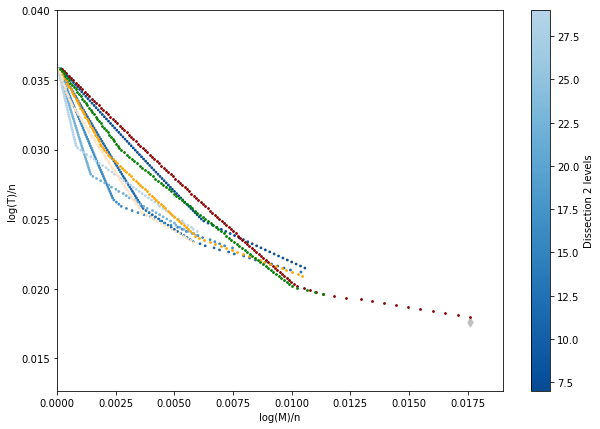

In [4]:
plt.figure(figsize = (10,7))
# Set x,y limits
axes = plt.gca()
axes.set_ylim([0.008*math.log(3,2),0.04])
axes.set_xlim([0.0*math.log(3,2),0.0120*math.log(3,2)])

plt.xlabel("log(M)/n")
plt.ylabel("log(T)/n")

plt.scatter(0.0176, 0.0176, label= "k-tree + representations", s=40, marker="d",c ="silver")

resol = 200

Remin = 0.001
Remax = 0.2
npoints = 400

print("Values of max l coefficient")

# Customized cmap
Blues_modified = cm.get_cmap('Blues', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
cmap2 = ListedColormap(Blues_modified(np.linspace(0.9, 0.3, 256)))

## Plotting level 2 dissections
h = 2 ; print("Two levels")
Interesting_dissections_two = [7,11,16,22,29]
M = []
T = []
track_colormap = [] 
for X in Interesting_dissections_two:
    (memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
    track_colormap = np.append(track_colormap, [X for _ in range(0, len(memories))])
    M = np.append(M, memories)
    T = np.append(T, times)
    print(str(X) + ": " + str(max(Res)))

plt.scatter(M, T, s = 3, c = track_colormap, cmap = cmap2)
cbar = plt.colorbar()
cbar.set_label('Dissection 2 levels')
## Plotting level 3 dissectiropositionons
h = 3; print("Three levels")
Interesting_dissections_three = [4,7,11]
colors = ["darkred", "orange", "bisque"]; icols = 0
for X in Interesting_dissections_three:
    (memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
    plt.scatter(memories, times, s=3, c=colors[icols], label = "r = " +str(X) + " h = " +str(h))
    icols = icols + 1
    print(str(X) + ": " + str(max(Res)))


h = 4
X = 4; print("Four levels")
(memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
plt.scatter(memories, times, s = 3, c="green", label="r = 4 h = 4")
print(str(X) + ": " + str(max(Res)))


plt.plot(M_dissec,T_dissec, markersize = 4, linewidth = 0, color = "lightgray", marker = 'o', label = "Dissection")

print("k-tree")
mems,complexities, Reused,_  = smoothed_kTree(R, W,npoints=npoints, Remin=Remin,Remax = Remax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "black", marker = 'x', label = "Smoothed k-tree")
print(str(max(Reused)))

print("Smoothed k-tree")
mems,complexities, Reused,_  = kTree(R, W,npoints=npoints, Remin=Remin, Remax = Remax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "grey", marker = 'x', label = "k-tree ")
print(str(max(Reused)))

TMM = [2*m for m in mems]
TMMM = [3*m for m in mems]
TMMMM = [4*m for m in mems]

plt.plot(mems, TMM, "slateblue", linewidth=0.3)
plt.plot(mems, TMMM, "darkorchid", linewidth=0.3)
plt.plot(mems, TMMMM, "violet", linewidth=0.3)



# write text

l1 = np.array((66./n, 268./n))
angle = 66.5
th1 = plt.text(l1[0], l1[1], "T=M⁴", fontsize=12,
               rotation=angle, rotation_mode='anchor', c="violet")

l1 = np.array((89./n, 270./n))
angle = 62
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M³', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")


l1 = np.array((128./n, 258./n))
angle = 52.5
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M²', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")

plt.legend(loc='lower left')
#plt.title("Timle")




# 'Real'
(takes a lot of time)

Text(0, 0.5, 'log2(T)')

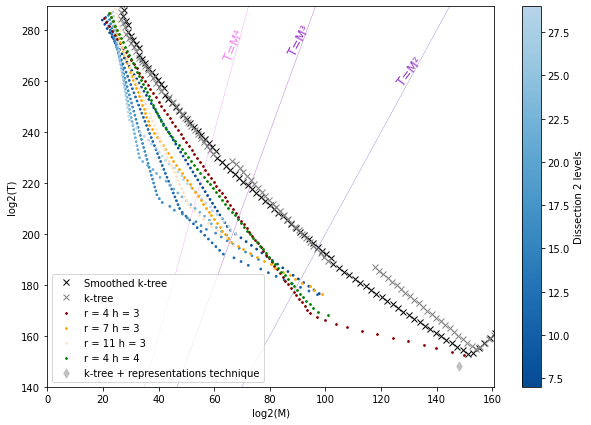

In [5]:
plt.figure(figsize = (10,7))
# Set x,y limits
axes = plt.gca()
axes.set_ylim([140,0.04*n])
axes.set_xlim([0.0*math.log(3,2)*n,0.0140*math.log(3,2)*n])

plt.xlabel("log(M)/n")
plt.ylabel("log(T)/n")

lmin = 2
lmax = int(n*0.08)
nbls = 100
nbtarget=50


# Customized cmap
Blues_modified = cm.get_cmap('Blues', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
#Oranges_modified = cm.get_cmap('Oranges', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
cmap2 = ListedColormap(Blues_modified(np.linspace(0.9, 0.3, 256)))
#cmap3 = ListedColormap(Oranges_modified(np.linspace(0.9, 0.3, 256)))




## Plotting level 2 dissections
h = 2
Interesting_dissections_two = [7,11,16,22,29]
M = []
T = []
track_colormap = [] 
for X in Interesting_dissections_two:
    (memories, times,_, Res) = layered_dissections.real_Apply(n, k, w, X, h, lmin, lmax, nbls=nbls, nbtarget=nbtarget)
    track_colormap = np.append(track_colormap, [X for _ in range(0, len(memories))])
    M = np.append(M, memories)
    T = np.append(T, times)

plt.scatter(M, T, s = 3, c = track_colormap, cmap = cmap2)
cbar = plt.colorbar()
cbar.set_label('Dissection 2 levels')

## Plotting level 3 dissections
h = 3
Interesting_dissections_three = [4,7,11]
colors = ["darkred", "orange", "bisque"]; icols = 0
for X in Interesting_dissections_three:
    (memories, times,_, Res) = layered_dissections.real_Apply(n, k, w, X, h, lmin, lmax, nbls=nbls, nbtarget=nbtarget)
    plt.scatter(memories, times, s=3, c=colors[icols], label = "r = " +str(X) + " h = " +str(h))
    icols = icols + 1


h = 4
X = 4
(memories, times,_, Res) = layered_dissections.real_Apply(n, k, w, X, h, lmin, lmax, nbls=nbls, nbtarget=nbtarget)
plt.scatter(memories, times, s = 3, c="green", label="r = 4 h = 4")


#dissection + Wave TM
#plt.plot(2/11*0.060835*math.log(3,2),2/11*0.060835*math.log(3,2),"silver", label="Wave",marker=".", linewidth = 0, markersize = 8)

# Wave TM tardeoff plotting
"""memories = np.linspace(0.001*math.log(3,2), 2/11*0.060835*math.log(3,2), 100)
TM_tradeoff = [-m + 4/11*0.060835*math.log(3,2) for m in memories]
plt.plot(memories, TM_tradeoff, "red", label="Wave TM tardeoff")"""


#plt.plot(M_dissec,T_dissec, markersize = 4, linewidth = 0, color = "lightgray", marker = 'o', label = "Dissection")

mems,complexities, Reused = real_smoothed_kTree(n,k, w,npoints=nbls,lmin=lmin, lmax=lmax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "black", marker = 'x', label = "Smoothed k-tree")

mems,complexities, Reused  = real_kTree(n,k, w,npoints=nbls,lmin=lmin, lmax=lmax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "grey", marker = 'x', label = "k-tree ")


TMM = [2*m for m in mems]
TMMM = [3*m for m in mems]
TMMMM = [4*m for m in mems]

plt.plot(mems, TMM, "slateblue", linewidth=0.3)
plt.plot(mems, TMMM, "darkorchid", linewidth=0.3)
plt.plot(mems, TMMMM, "violet",  linewidth=0.3)

# write text

l1 = np.array((66, 268))
angle = 66.5
th1 = plt.text(l1[0], l1[1], "T=M⁴", fontsize=12,
               rotation=angle, rotation_mode='anchor', c="violet")

l1 = np.array((89, 270))
angle = 62
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M³', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")


l1 = np.array((128, 258))
angle = 52.5
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M²', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")

a=7
coeff_mem = math.log(2**a*2*n,2) # Number of lists times vector size times F3 coeff
coeff_times = math.log((2**a-1)*2*n,2) #  number of considered mergings times memory coeff
plt.scatter(0.0176*n+coeff_mem, 0.0176*n+coeff_times, label="k-tree + representations technique", s=40, marker="d",c ="silver")


plt.legend(loc='lower left')
plt.xlabel("log2(M)")
plt.ylabel("log2(T)")

